In [1]:
import pandas as pd
import pyspark as spark
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
sc = spark.SparkContext()
sql = spark.SQLContext(sc)
from pyspark.sql.types import *
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from elephas.utils.rdd_utils import to_simple_rdd


Using TensorFlow backend.


In [16]:
df = pd.read_csv('/Users/rohitsuvarna/Downloads/finalOutTwo.csv',header=None)

In [17]:
df.columns = ['DateTime','Sentiment_score','Price']

Plotting the input variables

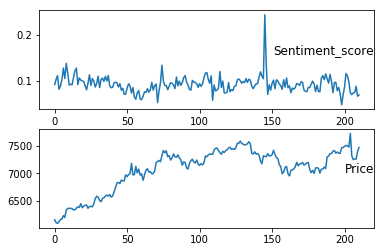

In [4]:
values = df.values
# specify columns to plot
groups = [ 1, 2]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [5]:
df.set_index('DateTime',inplace=True)

In [6]:
df

,Sentiment_score,Price
DateTime,,
2017-10-31T05:00:00.000-04:00,0.092263,6158.76
2017-10-31T06:00:00.000-04:00,0.103770,6105.90
2017-10-31T07:00:00.000-04:00,0.111691,6094.36
2017-10-31T08:00:00.000-04:00,0.082134,6125.13
2017-10-31T09:00:00.000-04:00,0.089370,6165.00
2017-10-31T10:00:00.000-04:00,0.102672,6170.77
2017-10-31T11:00:00.000-04:00,0.128146,6233.74
2017-10-31T12:00:00.000-04:00,0.105498,6201.03
2017-10-31T13:00:00.000-04:00,0.138458,6332.34


In [7]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df


,Price,Sentiment_score
DateTime,,
2017-10-31T05:00:00.000-04:00,6158.76,0.092263
2017-10-31T06:00:00.000-04:00,6105.90,0.103770
2017-10-31T07:00:00.000-04:00,6094.36,0.111691
2017-10-31T08:00:00.000-04:00,6125.13,0.082134
2017-10-31T09:00:00.000-04:00,6165.00,0.089370
2017-10-31T10:00:00.000-04:00,6170.77,0.102672
2017-10-31T11:00:00.000-04:00,6233.74,0.128146
2017-10-31T12:00:00.000-04:00,6201.03,0.105498
2017-10-31T13:00:00.000-04:00,6332.34,0.138458


In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [9]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [10]:
n_hours = 3
n_features = 2
n_obs = n_hours*n_features

In [11]:
reframed = series_to_supervised(scaled, n_hours, 1)
reframed

,var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
3,0.039567,0.223441,0.007090,0.282312,0.000000,0.322835,0.018905,0.171625
4,0.007090,0.282312,0.000000,0.322835,0.018905,0.171625,0.043401,0.208645
5,0.000000,0.322835,0.018905,0.171625,0.043401,0.208645,0.046946,0.276694
6,0.018905,0.171625,0.043401,0.208645,0.046946,0.276694,0.085634,0.407021
7,0.043401,0.208645,0.046946,0.276694,0.085634,0.407021,0.065537,0.291150
8,0.046946,0.276694,0.085634,0.407021,0.065537,0.291150,0.146213,0.459774
9,0.085634,0.407021,0.065537,0.291150,0.146213,0.459774,0.165131,0.354060
10,0.065537,0.291150,0.146213,0.459774,0.165131,0.354060,0.166378,0.218619
11,0.146213,0.459774,0.165131,0.354060,0.166378,0.218619,0.166144,0.227313
12,0.165131,0.354060,0.166378,0.218619,0.166144,0.227313,0.164307,0.222447


In [12]:
reframed = reframed.drop(reframed.columns[-1], axis=1)
reframed

,var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t)
3,0.039567,0.223441,0.007090,0.282312,0.000000,0.322835,0.018905
4,0.007090,0.282312,0.000000,0.322835,0.018905,0.171625,0.043401
5,0.000000,0.322835,0.018905,0.171625,0.043401,0.208645,0.046946
6,0.018905,0.171625,0.043401,0.208645,0.046946,0.276694,0.085634
7,0.043401,0.208645,0.046946,0.276694,0.085634,0.407021,0.065537
8,0.046946,0.276694,0.085634,0.407021,0.065537,0.291150,0.146213
9,0.085634,0.407021,0.065537,0.291150,0.146213,0.459774,0.165131
10,0.065537,0.291150,0.146213,0.459774,0.165131,0.354060,0.166378
11,0.146213,0.459774,0.165131,0.354060,0.166378,0.218619,0.166144
12,0.165131,0.354060,0.166378,0.218619,0.166144,0.227313,0.164307


In [13]:
values = reframed.values
n_train_hours = 170
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape

(170, 7)

In [14]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [15]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(170, 3, 2) (170,) (38, 3, 2) (38,)


In [ ]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history


In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours* n_features))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
plt.plot(inv_y)
plt.plot(inv_yhat)

In [ ]:
plt.show()

In [ ]:
inv_y = np.insert(inv_y,0,7000)

In [ ]:
plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

In [ ]:
plt.show()

# Elephas Implementation

In [18]:
spark_df = sql.createDataFrame(df)
CleanDF = spark_df.withColumn("DateTime_casted",spark_df['DateTime'].cast(TimestampType()))
FinalDf = CleanDF.selectExpr("DateTime_casted as Date_Time", "Sentiment_score",'Price AS Price1')

In [ ]:
from keras.engine.training import _slice_arrays

In [ ]:
FinalDf.show()

In [ ]:
from pyspark.sql.functions import lag, col
from pyspark.sql.window import Window
for i in range(2,3):
    col1 = "Price%d"%(i-1)
    col2 = "Price%d"%i
    w = Window().partitionBy().orderBy(col("Date_Time"))
    FinalDf=FinalDf.select("*", lag(col1).over(w).alias(col2)).na.drop()
    FinalDf.show()

In [ ]:
FinalDf = FinalDf.selectExpr('Date_Time','Sentiment_score','Price2 as Input_price','Price1 as Price')

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

In [19]:
rdd = to_simple_rdd(sc, train_X, train_y)

In [20]:
rdd.count()

170

In [21]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
#from keras.models import model_from_yaml,slice_X


In [22]:
from keras.utils import np_utils
from elephas.spark_model import SparkModel
from elephas.utils.rdd_utils import to_simple_rdd
from elephas import optimizers as elephas_optimizers

In [23]:
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [24]:
adam = elephas_optimizers.Adam()

In [28]:
spark_model = SparkModel(sc,model, optimizer=adam, frequency='epoch', mode='asynchronous', num_workers=2)
spark_model.train(rdd, nb_epoch=50, batch_size=4, verbose=2)

 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 8.0 failed 1 times, most recent failure: Lost task 0.0 in stage 8.0 (TID 26, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/rohitsuvarna/anaconda/envs/keras/lib/python3.6/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 166, in main
    func, profiler, deserializer, serializer = read_command(pickleSer, infile)
  File "/Users/rohitsuvarna/anaconda/envs/keras/lib/python3.6/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 55, in read_command
    command = serializer._read_with_length(file)
  File "/Users/rohitsuvarna/anaconda/envs/keras/lib/python3.6/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 169, in _read_with_length
    return self.loads(obj)
  File "/Users/rohitsuvarna/anaconda/envs/keras/lib/python3.6/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 451, in loads
    return pickle.loads(obj, encoding=encoding)
  File "/Users/rohitsuvarna/anaconda/lib/python3.6/site-packages/elephas/spark_model.py", line 60, in <module>
    from keras.models import model_from_yaml, slice_X
ImportError: cannot import name 'slice_X'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:108)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:335)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1499)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1487)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1486)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1486)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1714)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1669)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1658)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:630)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2022)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2043)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2062)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2087)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:936)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:935)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:458)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/rohitsuvarna/anaconda/envs/keras/lib/python3.6/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 166, in main
    func, profiler, deserializer, serializer = read_command(pickleSer, infile)
  File "/Users/rohitsuvarna/anaconda/envs/keras/lib/python3.6/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 55, in read_command
    command = serializer._read_with_length(file)
  File "/Users/rohitsuvarna/anaconda/envs/keras/lib/python3.6/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 169, in _read_with_length
    return self.loads(obj)
  File "/Users/rohitsuvarna/anaconda/envs/keras/lib/python3.6/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 451, in loads
    return pickle.loads(obj, encoding=encoding)
  File "/Users/rohitsuvarna/anaconda/lib/python3.6/site-packages/elephas/spark_model.py", line 60, in <module>
    from keras.models import model_from_yaml, slice_X
ImportError: cannot import name 'slice_X'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:108)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:335)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
